In [1]:
import pandas as pd
import numpy as np
import ast  # 用于安全解析字符串


data = pd.read_csv('logs/20250703_180242/lr0.0003_hf8_nl4_nb10/setup_errors.csv')
data

,setup_id,setup_params,true_mean,pred_mean,relative_error,n_samples
0,0,"[0.0010000000474974513, 0.0010000000474974513,...",0.120051,0.083592,0.303700,200
1,1,"[0.0010000000474974513, 0.004999999888241291, ...",0.157798,0.159802,0.012699,200
2,2,"[0.0010000000474974513, 0.009999999776482582, ...",0.027419,0.027916,0.018160,500
3,3,"[0.0010000000474974513, 0.009999999776482582, ...",0.266169,0.098569,0.629676,500
4,4,"[0.0010000000474974513, 0.07999999821186066, 9...",0.009020,0.010516,0.165835,200
...,...,...,...,...,...,...
672,672,"[2.0, 0.4000000059604645, 0.05000000074505806,...",0.435523,0.402535,0.075744,500
673,673,"[2.0, 0.44999998807907104, 0.00050000002374872...",0.342868,0.280187,0.182812,200
674,674,"[2.0, 0.44999998807907104, 0.00079999997979030...",0.340654,0.337862,0.008195,500
675,675,"[2.0, 0.550000011920929, 0.0020000000949949026...",0.287156,0.279480,0.026733,500


In [2]:
# 解析setup_params列并拆分成6个新列
def parse_setup_params(setup_params_str):
    """
    解析setup_params字符串，返回6个参数值
    """
    try:
        # 使用ast.literal_eval安全地解析字符串为列表
        params_list = ast.literal_eval(setup_params_str)
        return params_list
    except:
        # 如果解析失败，返回None值
        return [None] * 6

In [3]:
# 应用解析函数到setup_params列
parsed_params = data['setup_params'].apply(parse_setup_params)

# 将解析结果转换为DataFrame
params_df = pd.DataFrame(parsed_params.tolist(), 
                        columns=['mf', 'mf1', 'mf2', 'gamma1', 'gamma2', 'Tcoh'])

# 将新列添加到原始DataFrame中
# 可以选择插入到特定位置，这里插入到setup_params列之后
insert_position = data.columns.get_loc('setup_params') + 1

for i, col in enumerate(['mf', 'mf1', 'mf2', 'gamma1', 'gamma2', 'Tcoh']):
    data.insert(insert_position + i, col, params_df[col])

# mf, mf1, mf2 四舍五入保留3位小数

data

,setup_id,setup_params,mf,mf1,mf2,gamma1,gamma2,Tcoh,true_mean,pred_mean,relative_error,n_samples
0,0,"[0.0010000000474974513, 0.0010000000474974513,...",0.001,0.001,0.0020,3.0,19.0,10.0,0.120051,0.083592,0.303700,200
1,1,"[0.0010000000474974513, 0.004999999888241291, ...",0.001,0.005,0.0050,1.0,19.0,15.0,0.157798,0.159802,0.012699,200
2,2,"[0.0010000000474974513, 0.009999999776482582, ...",0.001,0.010,0.0008,9.0,15.0,15.0,0.027419,0.027916,0.018160,500
3,3,"[0.0010000000474974513, 0.009999999776482582, ...",0.001,0.010,0.0100,19.0,95.0,10.0,0.266169,0.098569,0.629676,500
4,4,"[0.0010000000474974513, 0.07999999821186066, 9...",0.001,0.080,0.0001,15.0,51.0,15.0,0.009020,0.010516,0.165835,200
...,...,...,...,...,...,...,...,...,...,...,...,...
672,672,"[2.0, 0.4000000059604645, 0.05000000074505806,...",2.000,0.400,0.0500,11.0,63.0,15.0,0.435523,0.402535,0.075744,500
673,673,"[2.0, 0.44999998807907104, 0.00050000002374872...",2.000,0.450,0.0005,7.0,39.0,30.0,0.342868,0.280187,0.182812,200
674,674,"[2.0, 0.44999998807907104, 0.00079999997979030...",2.000,0.450,0.0008,7.0,11.0,15.0,0.340654,0.337862,0.008195,500
675,675,"[2.0, 0.550000011920929, 0.0020000000949949026...",2.000,0.550,0.0020,13.0,83.0,15.0,0.287156,0.279480,0.026733,500


In [14]:
data['mf'] = data['mf'].round(5)
data['mf1'] = data['mf1'].round(5)
data['mf2'] = data['mf2'].round(5)  

data

,setup_id,setup_params,mf,mf1,mf2,gamma1,gamma2,Tcoh,true_mean,pred_mean,relative_error,n_samples
0,0,"[0.0010000000474974513, 0.0010000000474974513,...",0.001,0.001,0.002,3.0,19.0,10.0,0.120051,0.083592,0.303700,200
1,1,"[0.0010000000474974513, 0.004999999888241291, ...",0.001,0.005,0.005,1.0,19.0,15.0,0.157798,0.159802,0.012699,200
2,2,"[0.0010000000474974513, 0.009999999776482582, ...",0.001,0.010,0.001,9.0,15.0,15.0,0.027419,0.027916,0.018160,500
3,3,"[0.0010000000474974513, 0.009999999776482582, ...",0.001,0.010,0.010,19.0,95.0,10.0,0.266169,0.098569,0.629676,500
4,4,"[0.0010000000474974513, 0.07999999821186066, 9...",0.001,0.080,0.000,15.0,51.0,15.0,0.009020,0.010516,0.165835,200
...,...,...,...,...,...,...,...,...,...,...,...,...
672,672,"[2.0, 0.4000000059604645, 0.05000000074505806,...",2.000,0.400,0.050,11.0,63.0,15.0,0.435523,0.402535,0.075744,500
673,673,"[2.0, 0.44999998807907104, 0.00050000002374872...",2.000,0.450,0.001,7.0,39.0,30.0,0.342868,0.280187,0.182812,200
674,674,"[2.0, 0.44999998807907104, 0.00079999997979030...",2.000,0.450,0.001,7.0,11.0,15.0,0.340654,0.337862,0.008195,500
675,675,"[2.0, 0.550000011920929, 0.0020000000949949026...",2.000,0.550,0.002,13.0,83.0,15.0,0.287156,0.279480,0.026733,500


In [20]:
data['relative_error'].mean()

np.float64(0.10832227838236434)

<Axes: title={'center': 'Mean Relative Error by mf'}, xlabel='mf'>

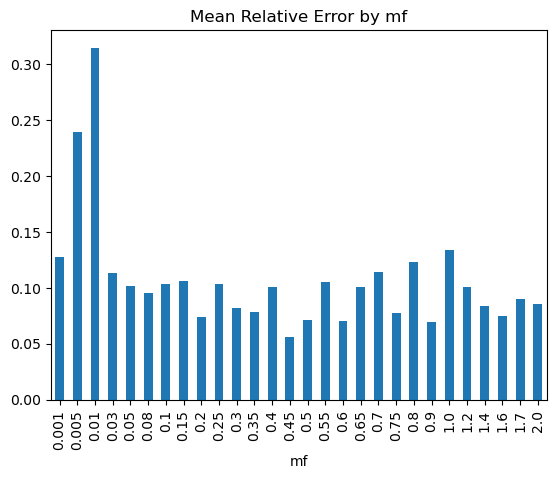

In [15]:
data.groupby(['mf'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by mf')

<Axes: title={'center': 'Mean Relative Error by mf1'}, xlabel='mf1'>

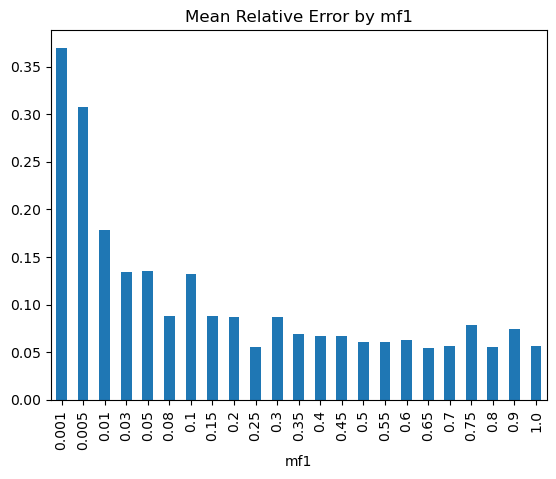

In [45]:
data.groupby(['mf1'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by mf1')

<Axes: title={'center': 'Mean Relative Error by mf2'}, xlabel='mf2'>

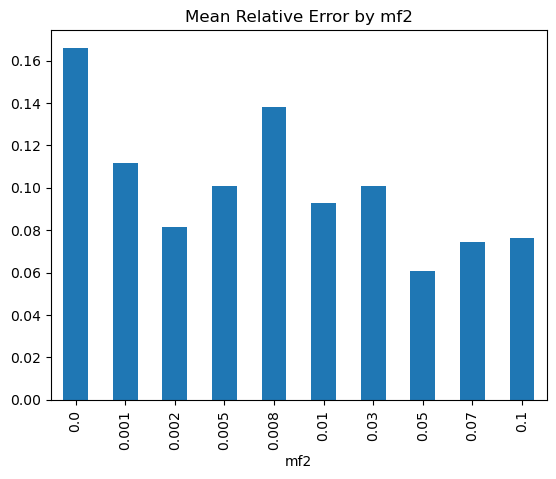

In [46]:
data.groupby(['mf2'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by mf2')

<Axes: title={'center': 'Mean Relative Error by Tcoh'}, xlabel='Tcoh'>

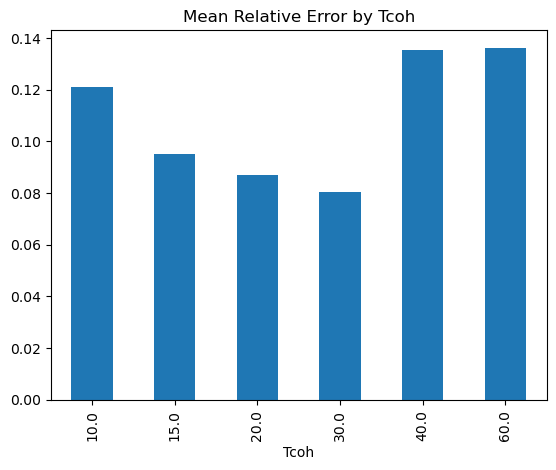

In [44]:
data.groupby(['Tcoh'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by Tcoh')

<Axes: title={'center': 'Mean Relative Error by gamma1'}, xlabel='gamma1'>

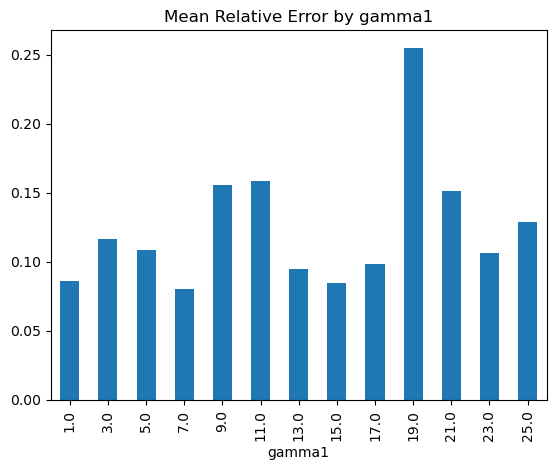

In [54]:
data.groupby(['gamma1'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by gamma1')

<Axes: title={'center': 'Mean Relative Error by mf'}, xlabel='gamma2'>

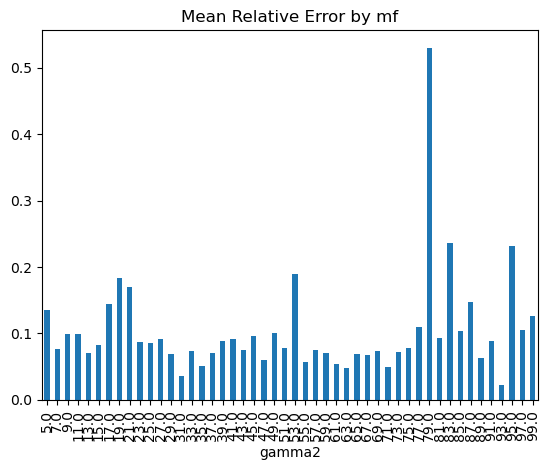

In [ ]:
data.groupby(['gamma2'])['relative_error'].mean().plot(kind='bar', title='Mean Relative Error by gamma2')

In [24]:
# delete data points on the edge
max_mf, min_mf = data['mf'].max(), data['mf'].min()
max_mf1, min_mf1 = data['mf1'].max(), data['mf1'].min()
max_mf2, min_mf2 = data['mf2'].max(), data['mf2'].min()
max_gamma1, min_gamma1 = data['gamma1'].max(), data['gamma1'].min()
max_gamma2, min_gamma2 = data['gamma2'].max(), data['gamma2'].min()
max_Tcoh, min_Tcoh = data['Tcoh'].max(), data['Tcoh'].min()
data_filtered = data[(data['mf'] > min_mf) & (data['mf'] < max_mf)]
data_filtered = data_filtered[(data_filtered['mf1'] > min_mf1) & (data_filtered['mf1'] < max_mf1)]
data_filtered = data_filtered[(data_filtered['mf2'] > min_mf2) & (data_filtered['mf2'] < max_mf2)]
data_filtered = data_filtered[(data_filtered['gamma1'] > min_gamma1) & (data_filtered['gamma1'] < max_gamma1)]
data_filtered = data_filtered[(data_filtered['gamma2'] > min_gamma2) & (data_filtered['gamma2'] < max_gamma2)]
data_filtered = data_filtered[(data_filtered['Tcoh'] > min_Tcoh) & (data_filtered['Tcoh'] < max_Tcoh)]

data_filtered.relative_error.mean()

np.float64(0.08639505393676046)

In [26]:
data['mae'] = np.abs(data['pred_mean'] - data['true_mean']) 
data['mae'].mean()

np.float64(0.018250471017972746)

In [27]:
data_filtered['mae'] = np.abs(data_filtered['pred_mean'] - data_filtered['true_mean'])
data_filtered['mae'].mean()

np.float64(0.011863083564094266)

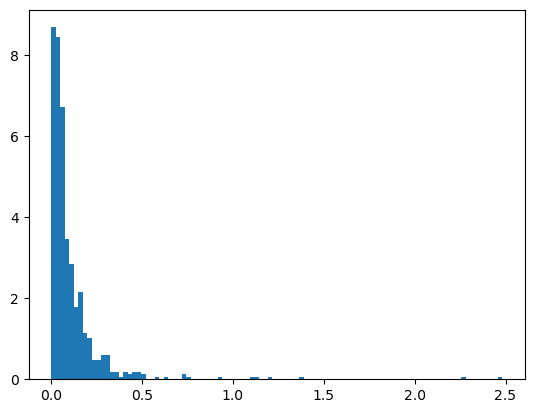

In [42]:
import matplotlib.pyplot as plt
plt.hist(data['relative_error'], bins=100, density=True, label='Relative Error')
# plt.yscale('log')
plt.show()

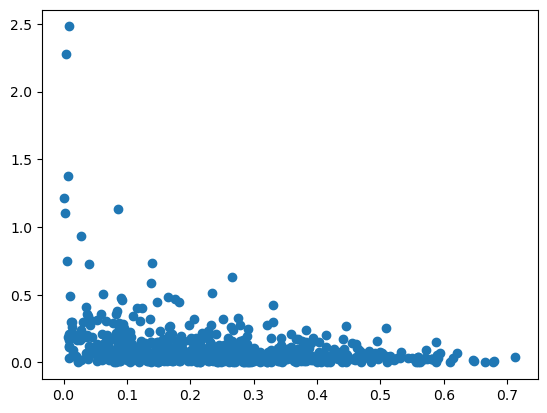

In [41]:
plt.scatter(data['true_mean'], data['relative_error'], label='mf')
# plt.yscale('log')

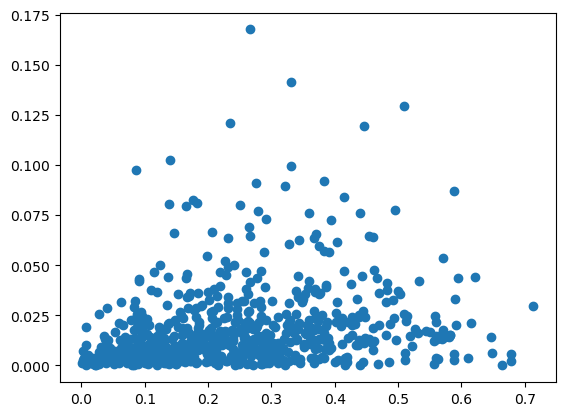

In [43]:
plt.scatter(data['true_mean'], data['mae'], label='mf')


<Axes: title={'center': 'Mean abs Error by mf'}, xlabel='mf'>

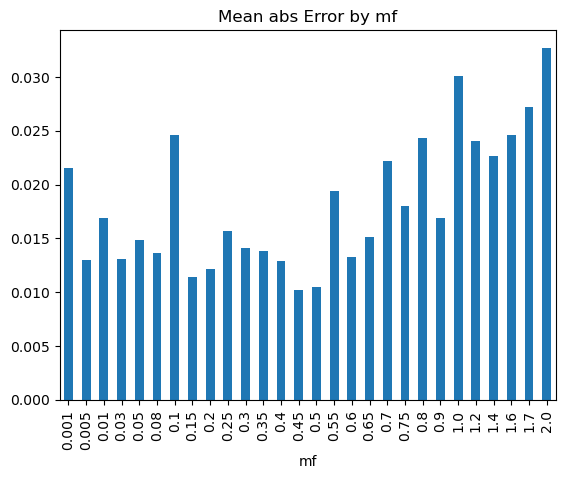

In [48]:
data.groupby(['mf'])['mae'].mean().plot(kind='bar', title='Mean abs Error by mf')

<Axes: title={'center': 'Mean abs Error by mf1'}, xlabel='mf1'>

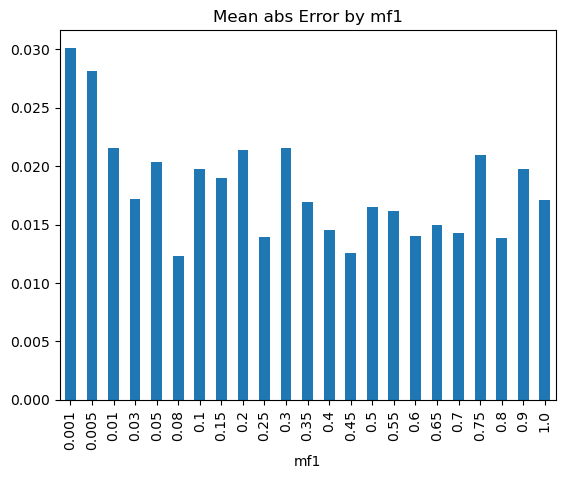

In [49]:
data.groupby(['mf1'])['mae'].mean().plot(kind='bar', title='Mean abs Error by mf1')

<Axes: title={'center': 'Mean abs Error by mf2'}, xlabel='mf2'>

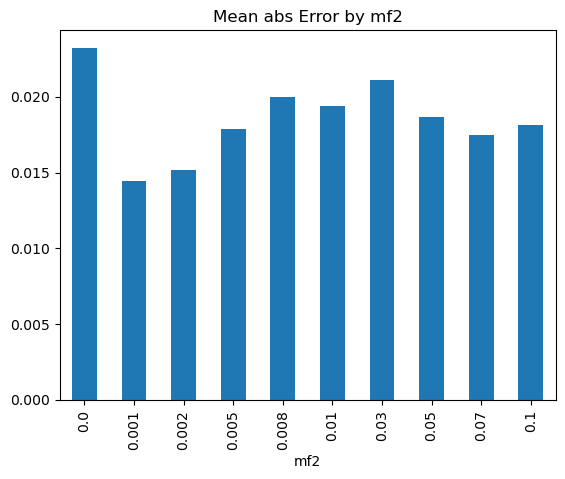

In [50]:
data.groupby(['mf2'])['mae'].mean().plot(kind='bar', title='Mean abs Error by mf2')

<Axes: title={'center': 'Mean abs Error by gamma1'}, xlabel='gamma1'>

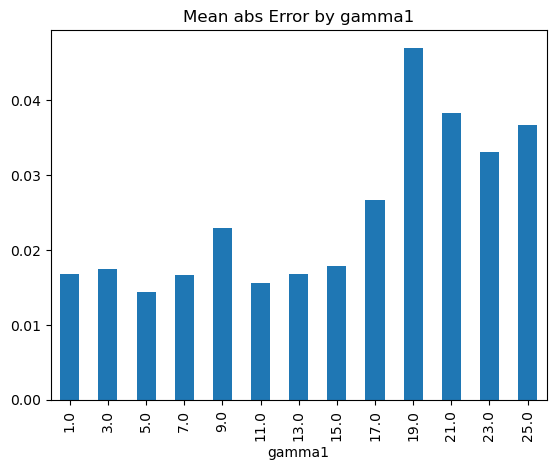

In [51]:
data.groupby(['gamma1'])['mae'].mean().plot(kind='bar', title='Mean abs Error by gamma1')

<Axes: title={'center': 'Mean abs Error by gamma2'}, xlabel='gamma2'>

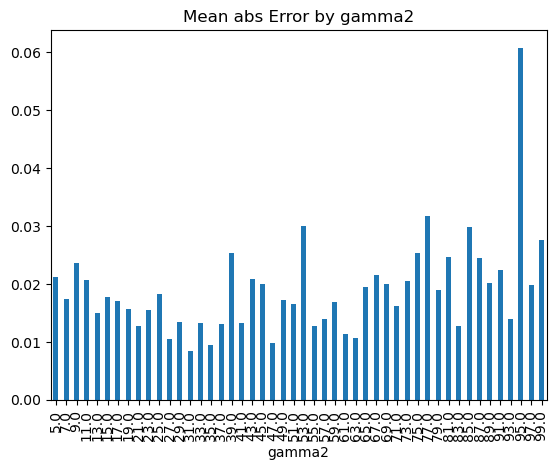

In [52]:
data.groupby(['gamma2'])['mae'].mean().plot(kind='bar', title='Mean abs Error by gamma2')

<Axes: title={'center': 'Mean abs Error by Tcoh'}, xlabel='Tcoh'>

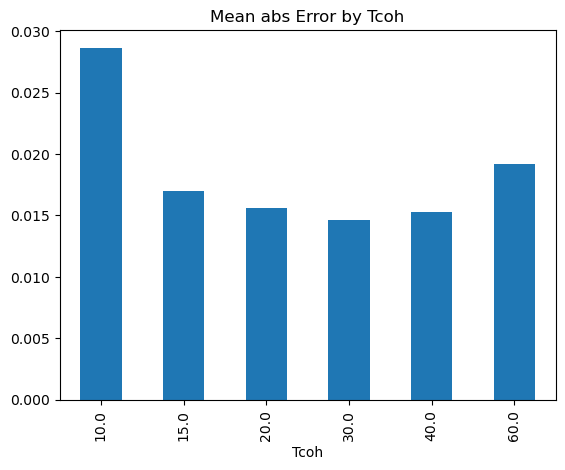

In [53]:
data.groupby(['Tcoh'])['mae'].mean().plot(kind='bar', title='Mean abs Error by Tcoh')